In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
sample_submission = pd.read_csv('C:/Users/msree/OneDrive/Desktop/MDS/MNIST/sample_submission.csv')
df_train = pd.read_csv('C:/Users/msree/OneDrive/Desktop/MDS/MNIST/train.csv')
df_test = pd.read_csv('C:/Users/msree/OneDrive/Desktop/MDS/MNIST/test.csv')

In [3]:
print(df_test.shape, df_train.shape)

(28000, 784) (42000, 785)


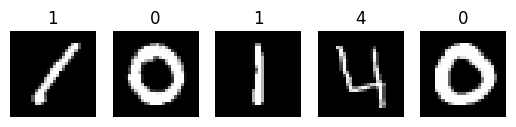

In [4]:
# Plot 5 sample digits
fig, axes = plt.subplots(1, 5)
for i, ax in enumerate(axes):
    ax.imshow(df_train.iloc[i, 1:].to_numpy().reshape(28, 28), cmap='gray')
    ax.set_title(df_train.iloc[i, 0])
    ax.axis('off')
plt.show()

PreProcessing

In [6]:
from tensorflow.keras.utils import to_categorical  # type: ignore # One-hot encode

X = df_train.drop('label', axis=1).to_numpy()
y = df_train['label'].to_numpy()

# Normalize the pixel values  [0, 255] -> [0, 1]
X = X / 255.0

X = X.reshape(-1, 28, 28, 1) 

y = to_categorical(y, 10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Build the CNN model

from tensorflow.keras import models, layers # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Input # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D # type: ignore

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                              # Output layer
])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


history_conv = model_conv.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8866 - loss: 0.3727 - val_accuracy: 0.9790 - val_loss: 0.0678
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9829 - loss: 0.0529 - val_accuracy: 0.9844 - val_loss: 0.0449
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9905 - loss: 0.0323 - val_accuracy: 0.9860 - val_loss: 0.0397
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9867 - val_loss: 0.0393
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9887 - val_loss: 0.0401
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9972 - loss: 0.0111 - val_accuracy: 0.9889 - val_loss: 0.0400
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9877 - val_loss: 0.0397
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9974 - 

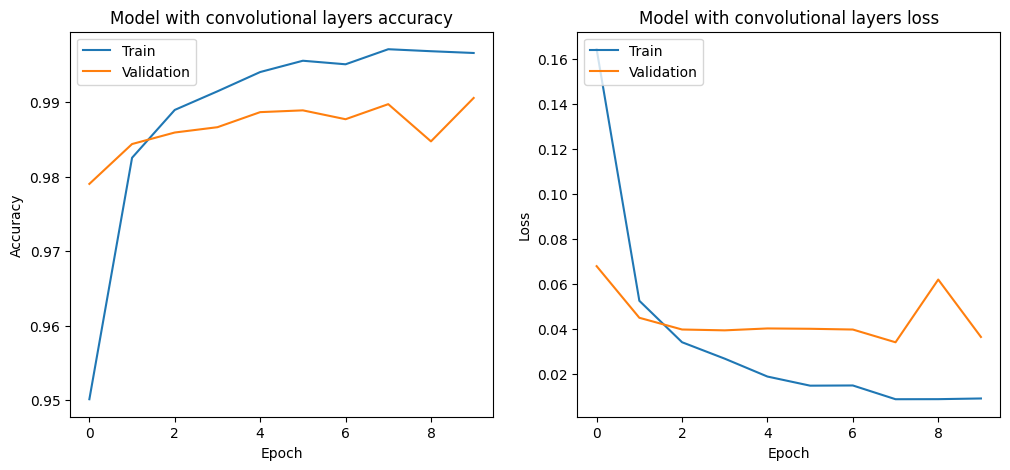

In [13]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');


history_plot(history_conv, model_name='Model with convolutional layers')

In [17]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                                    validation_data=(X_train, y_train),
                                    epochs=2,
                                    batch_size=32)

Epoch 1/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.7855 - loss: 0.6509 - val_accuracy: 0.9779 - val_loss: 0.0712
Epoch 2/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - accuracy: 0.9613 - loss: 0.1233 - val_accuracy: 0.9864 - val_loss: 0.0422


In [18]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Define the model creation function
def build_model(hp):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Conv2D(filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Flatten(),
        Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'),
        Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [22]:
# Create the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=1,
    directory='my_dir1',
    project_name='intro_to_kt1'
)

tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

print(f"Best hyperparameters: {best_hps}")

Trial 3 Complete [00h 03m 31s]
val_accuracy: 0.9848809242248535

Best val_accuracy So Far: 0.9857142567634583
Total elapsed time: 00h 10m 53s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000028F0936FD10>


In [24]:
history_best = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2)

Epoch 1/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9396 - loss: 0.1927 - val_accuracy: 0.9808 - val_loss: 0.0532
Epoch 2/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 87s 82ms/step - accuracy: 0.9796 - loss: 0.0682 - val_accuracy: 0.9873 - val_loss: 0.0389


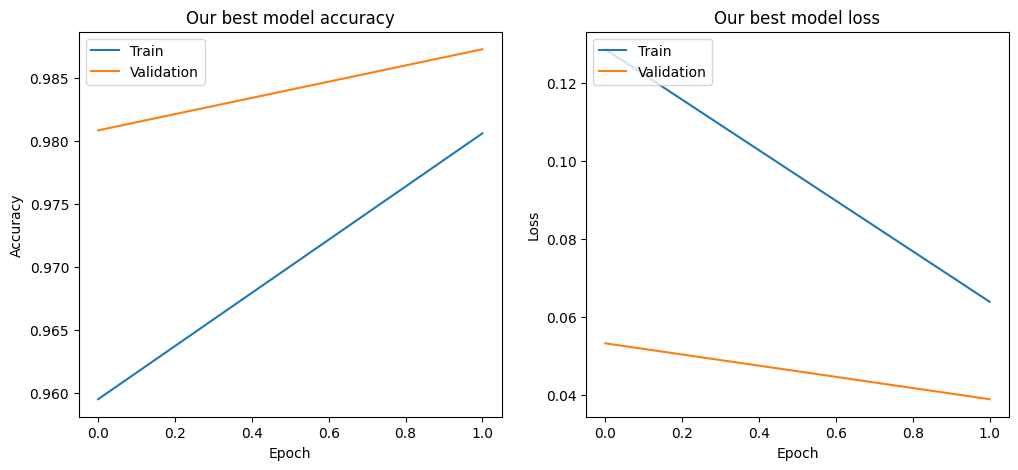

In [25]:
history_plot(history_best, model_name='Our best model')

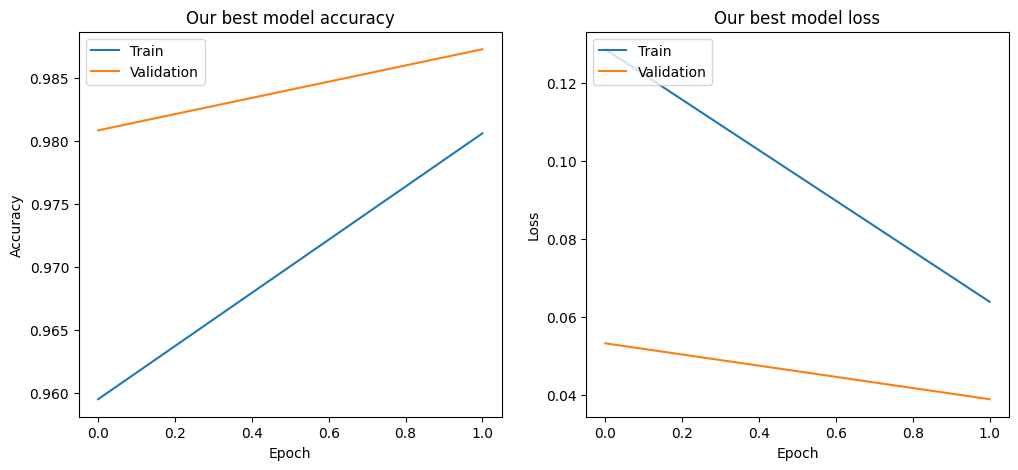

In [26]:
history_plot(history_best, model_name='Our best model')

In [27]:
y_val_pred = best_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step


In [28]:
test_loss, test_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.0388658307492733
Test Accuracy: 0.9872618913650513


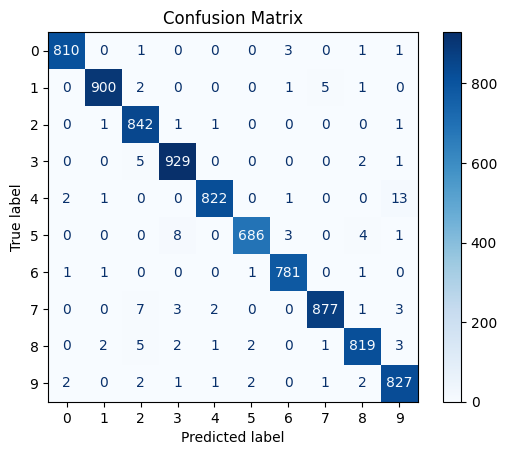

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [30]:
X_test = df_test.values

X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) 
y_final_pred = best_model.predict(X_test)
y_final_pred_classes = np.argmax(y_final_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step


In [31]:
list(sample_submission)

['ImageId', 'Label']

In [32]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(y_final_pred_classes) + 1),
    'Label': y_final_pred_classes
})

submission.to_csv('submission.csv', index=False)

print("Results have been saved to 'submission.csv'")

Results have been saved to 'submission.csv'


Training SVM model...
[LibSVM]
Validation accuracy: 0.9700

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.99      0.98      0.99       120
           2       0.98      0.95      0.97       104
           3       0.97      0.98      0.98       127
           4       0.93      0.99      0.96        79
           5       0.96      0.96      0.96        70
           6       0.97      0.99      0.98       116
           7       0.97      0.95      0.96       110
           8       0.96      0.97      0.97        79
           9       0.96      0.93      0.94        97

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



<Figure size 1000x800 with 0 Axes>

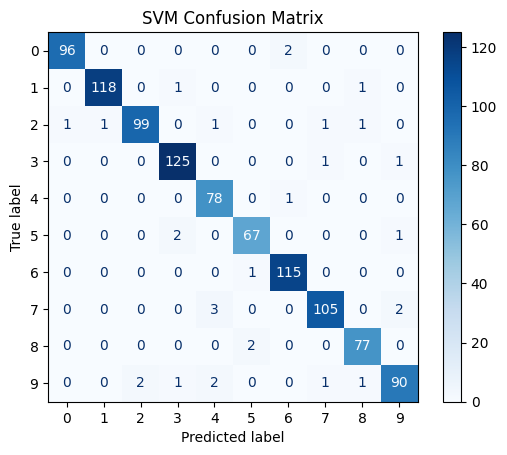

Making predictions on test set...
Results have been saved to 'submission_svm.csv'


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# First, let's prepare the data for SVM
# We need to flatten the images from (samples, 28, 28, 1) to (samples, 784)
# We'll use the original X and y before one-hot encoding

# Get original data
X = df_train.drop('label', axis=1).to_numpy()
y = df_train['label'].to_numpy()

# Normalize the pixel values [0, 255] -> [0, 1]
X = X / 255.0

# Split the data
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Due to computational constraints, we'll use a subset of the data
# SVM can be slow on large datasets
train_size = 10000  # Using first 10000 samples
X_train_subset = X_train_svm[:train_size]
y_train_subset = y_train_svm[:train_size]
X_val_subset = X_val_svm[:1000]  # Using 1000 samples for validation
y_val_subset = y_val_svm[:1000]

# Create and train SVM model
print("Training SVM model...")
svm_model = SVC(kernel='rbf', random_state=42, verbose=True)
svm_model.fit(X_train_subset, y_train_subset)

# Make predictions on validation set
y_val_pred_svm = svm_model.predict(X_val_subset)

# Calculate accuracy
accuracy = accuracy_score(y_val_subset, y_val_pred_svm)
print(f"\nValidation accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_subset, y_val_pred_svm))

# Create confusion matrix
cm_svm = confusion_matrix(y_val_subset, y_val_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[str(i) for i in range(10)])
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

# If you want to make predictions on the test set and create a submission
print("Making predictions on test set...")
X_test_svm = X_test.reshape(X_test.shape[0], -1)  # Flatten test data
y_test_pred_svm = svm_model.predict(X_test_svm)

# Create submission DataFrame
submission_svm = pd.DataFrame({
    'ImageId': np.arange(1, len(y_test_pred_svm) + 1),
    'Label': y_test_pred_svm
})

# Save predictions
submission_svm.to_csv('submission_svm.csv', index=False)
print("Results have been saved to 'submission_svm.csv'")
